Milton Cárdenas Fley - 2018109300
<br>Sebastián Picado González - 2018135190

## <div align="center">Tarea 1: Introducción a conexionistas básicos</div>

### Planeamiento del caso

<div align="justify">Se solicita que se trabaje con un conjunto de datos obtenidos por medio de una serie de recorridos efectuados por un robot de tipo SCITOS G5 dotado de un conjunto de 24 sensores reales. Dadas las características de los sensores y los experimentos planteados por los investigadores, se logró elaborar un conjunto de datos reducidos, donde los 24 sensores reales se convierten en 4 sensores virtuales.</div>

<div align="justify">Cada uno de estos sensores virtuales provee la mínima lectura recibida por los sensores reales en arcos de 60 grados en posiciones frontal, trasera, izquierda y derecha. </div>

<div align="justify">Para cada dato se tiene una etiqueta que lo clasifica en función de la acción que, determinada por ese dato, es la más adecuada en un seguimiento de pared. Existen 4 categorías en que se puede clasificar cada dato; a saber: movimiento hacia delante, leve giro a la derecha, giro brusco a la derecha, giro leve a la izquierda. </div>

### Planeamiento de la estrategia a seguir

<div align="justify">El primer paso para abordar este problema fue buscar imágenes del robot SCITOS G5, esto con el fin de comprender mejor la situación planteada y entender mejor el funcionamiento y ubicación de los sensores. </div>

<div align="justify">Con el problema planteado completamente analizado, se empezó a hacer una revisión bibliográfica de conceptos que se consideraron importantes para la correcta comprensión y desarrollo de la solución al problema planteado. Dentro de estos se encontraba: perceptrón, capa oculta, optimizadores, epoch y batch size, entre otros. </div>

<div align="justify">Posteriormente, se hizo la investigación y estudio de la herramienta TensorFlow. Utilizando tutoriales encontrados en internet y la guía que ofrece el mismo software en su página de internet, se comprendió como programar una red neuronal y como alterar sus hiperparámetros para poder experimentar y conseguir las mejores configuraciones posibles. </div>

<div align="justify">Con la red neuronal construida, se ejecutaron los métodos adecuados para el correcto análisis del resultado obtenido del clasificador. Además, se digitó el código necesario para obtener las gráficas que permitieron representar las fronteras lineales de separación obtenidas para cada combinación de tres parámetros.</div>

<div align="justify">Finalmente, se tuvo que escribir un código que permitiera generar un ruido a los datos obtenidos de los sensores del robot SCITOS G5. Con estos nuevos datos se ejecutó nuevamente la red neuronal diseñada para las actividades anteriores y se compararon los resultados obtenidos por esta red con los datos con ruido y sin ruido. </div>

## Desarrollo de la tarea

### <div align="justify">Clasificación con perceptrón aislado</div>

<div align="justify">Es necesario empezar por comprender la naturaleza del problema, en este se solicita clasificar cuatro diferentes tipos de datos. A saber: movimiento hacia delante, leve giro a la derecha, giro brusco a la derecha, giro leve a la izquierda. </div>

<div align="justify">Por lo tanto, se esperaría obtener cuatro regiones diferentes donde cada una representa una acción en particular. Tal como, de manera gráfica y con fines únicamente ilustrativos, se presenta en el siguiente cuadrado, el cual presenta una región roja, una azul, una verde y una amarilla; claramente diferenciables. </div>

![title](colores.jpg)

<div align="justify">Ahora bien, ¿por qué la clasificación no se podría hacer con un único perceptrón aislado?</div>

<div align="justify">El término perceptrón se utiliza para referirse a una única neurona; estas son capaces de ejecutar funciones linealmente separables sin ningún error. Que la función sea linealmente separable significa que la neurona puede separar el espacio I-dimensional de vectores de tal forma que, se produce una respuesta por encima de un umbral y una respuesta por debajo de este. Es decir, se genera un hiperplano que forma el límite entre los vectores de entrada asociados con los dos valores de salida.[1] </div>

<div align="justify">Por ejemplo, un perceptrón con la función rampa como la función de activación presenta el comportamiento que se puede observar en la imagen a continuación. El cual separa las entradas nⅇt-θ>0 de las entradas nⅇt-θ menor que 0.</div>

![image1](gráfica.png)

<div align="justify">En palabras menos técnicas, el perceptrón únicamente puede formar dos regiones. Comprendiendo que el problema presentado necesita de cuatro regiones; se logra concluir que es imposible que se pueda solucionar con una neurona aislada.</div>

### <div align="justify">Clasificación con una única red de perceptrones</div>

<div align="justify">Como se logra observar en la imagen, si se omite el uso de capas ocultas, las entradas se comunican directamente con las salidas; produciendo el equivalente a tener cuatro perceptrones independientes y, por ende, aislados. Estos están recibiendo las mismas cuatro entradas y produciendo una salida. Retomando la respuesta a la pregunta anterior, se sabe que la salida de un perceptrón aislado solo puede generar dos regiones de clasificación, lo que imposibilitaría la opción de resolver este problema sin capas ocultas; ya que, no se podrá generar una correcta delimitación de las regiones de cada clasificación.</div>

![image](capa.png)

<div align="justify">Cabe destacar que, en apoyo al argumento anterior, según la teoría en caso de crear una red neuronal para clasificar elementos, que es el caso de interés, es completamente necesaria al menos una capa oculta para clasificaciones no lineales. [2] Como se mostró anteriormente, la clasificación para el problema es no lineal; por lo que, será imposible resolverlo con una red con una conexión directa de la capa de entrada y la capa de salida.</div>

### <div align="justify">Desarrollo del modelo, optimización y rendimiento</div>

<div align="justify">Algunos conceptos que son importantes de comprender, ya que, van a ser usados más adelante son epoch, optimizador y batch size. Un epoch es una medida que se refiere al número de veces que se ejecutaran los algoritmos de forward propagation y de back propagation. [1] Para elegir este número, se ejecutó varias veces el código con distintos valores y se seleccionó uno que permitiera que el programa alcanzara un accuracy constante; pero que, a su vez no malgastara recursos corriendo iteraciones que ya no aportaran nada en términos de mejoras de aprendizaje. </div>

<div align="justify">Por otro lado, un optimizador es un algoritmo o método cuyo objetivo es reducir el valor de la función de error. Para este trabajo se decidió probar el optimizador Adam, SGD y el Adagrad. </div>

<div align="justify">Conocido como SGD, es aquel optimizador que implementa el algoritmo de descenso de gradiente estocástico con soporte para impulso, caída de la tasa de aprendizaje e impulso de Nesterov. [3]</div>

<div align="justify">El optimizador Adam es un método de descenso de gradiente estocástico que está basado en una estimación adaptativa de los momentos de primer y segundo orden. [4] Es considerado mejor que el SGD en la mayoría de los casos; sin embargo, existen casos en el que utilizar el método SGD da mejores resultados que utilizando el optimizador Adam. [5]</div>

<div align="justify">Por su parte, el algoritmo de optimización adaptativo Adagrad presenta la particularidad de que el paso de actualización de características de alta frecuencia es pequeño, mientras que la actualización de características de baja frecuencia es grande. Esto la hace ideal para aplicaciones que presentan escasez de datos. [6]</div>

<div align="justify">Finalmente, un batch size hace referencia a la cantidad de ejemplos utilizados para entrenar en una iteración. [7] Un valor recomendado para empezar las pruebas es un batch size de 32. [8] Por lo que se experimentó con múltiplos de este número, para el caso particular del programa, los mejores resultados se obtuvieron con un batch size de 16. </div>

<div align="justify">Aclarado lo anterior, ahora se llevará a cabo la elaboración de la red neuronal para resolver el problema. Primero, se deben cargar las librerías que se van a utilizar y los datos de los sensores.</div>

In [1]:
#Se importan las librerías necesarias

#Relacionado al manejo de redes neuronales
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers

#Para generar datos aleatorios
import random as rd

#Relacionado a la generación de gráficas
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Relacionado al manejo de datos
import numpy as np #for math and arrays
import pandas as pd #data for the data

In [2]:
all_ds = pd.read_csv('sensor.csv') #Se cargan los datos de los sensores

all_ds

,Sensor1,Sensor2,Sensor3,Sensor4,Movement
0,1.687,0.445,2.332,0.429,Slight-Right-Turn
1,1.687,0.449,2.332,0.429,Slight-Right-Turn
2,1.687,0.449,2.334,0.429,Slight-Right-Turn
3,1.687,0.449,2.334,0.429,Slight-Right-Turn
4,1.687,0.449,2.334,0.429,Slight-Right-Turn
...,...,...,...,...,...
5451,1.024,0.657,1.087,1.562,Move-Forward
5452,0.894,0.649,1.071,1.085,Sharp-Right-Turn
5453,0.873,0.642,1.053,1.105,Sharp-Right-Turn
5454,0.967,0.635,1.034,1.118,Move-Forward


<div align="justify">Una vez cargados los datos, se puede proceder a separarlos en conjunto de prueba y entrenamiento. Además, se deben codificar las clases, ya que la red neuronal no funciona con clases "en texto".</div>

In [3]:
#Se separan los datos de entrenamiento y de prueba con relación 80%/20%
#En adición, se mezclan los datos
train_dataset, test_dataset = train_test_split(all_ds, test_size = 0.2)

print(train_dataset.shape) #forma del array de entrenamiento
print(test_dataset.shape) #forma del array de prueba

(4364, 5)
(1092, 5)


In [4]:
#Se extrae la columna de las clases para cada grupo de datos
train_labels1 = train_dataset.pop('Movement')
test_labels1 = test_dataset.pop('Movement')

In [5]:
#Se codifican las clases
train_labels = pd.get_dummies(train_labels1, prefix = 'Label')
test_labels = pd.get_dummies(test_labels1, prefix = 'Label')

print(train_dataset)
train_labels

      Sensor1  Sensor2  Sensor3  Sensor4
3272    1.428    0.483    1.837    1.153
3232    0.576    0.515    1.852    1.018
4068    1.724    0.469    2.062    1.067
3436    0.892    0.472    2.594    1.367
5201    0.831    0.443    1.445    0.460
...       ...      ...      ...      ...
4696    1.275    0.603    1.571    0.912
865     0.778    0.800    1.355    0.787
4738    0.848    0.473    1.938    1.111
3218    2.070    0.566    2.772    0.813
4788    1.127    0.587    1.883    0.929

[4364 rows x 4 columns]


,Label_Move-Forward,Label_Sharp-Right-Turn,Label_Slight-Left-Turn,Label_Slight-Right-Turn
3272,0,0,0,1
3232,0,1,0,0
4068,0,0,0,1
3436,0,1,0,0
5201,0,1,0,0
...,...,...,...,...
4696,1,0,0,0
865,0,1,0,0
4738,0,1,0,0
3218,1,0,0,0


<div align="justify">Hecho lo anterior, se procederá a construir la red neuronal. Para comprobar que el algoritmo se ejecuta correctamente, se elegirán hiperparámetros aleatorios. </div>

In [6]:
def build_model(): #Se define el modelo
    model = Sequential()
    
    #Se añade capa de entrada para 4 variables, una capa oculta y su función de
    #activación
    model.add(Dense(2, input_dim = 4, activation = 'sigmoid'))
    
    #Se añade capa de salida de 4 neuronas (4 categorías) y su función de activación
    model.add(Dense(4, activation = 'sigmoid'))
    learning_rate = 0.01 #Se define tasa de aprendizaje
    optimizer = optimizers.SGD(learning_rate, momentum = 0.5) #Se define el optimizador
    model.compile(loss = 'categorical_crossentropy', #Se define función de pérdida
                 optimizer = optimizer,
                  
                 #Para medir la eficacia del modelo, se usa el parámetro de accuracy
                 metrics = ['accuracy'])
    return model

EPOCHS = 75 #cantidad de iteraciones
batch_size = 16

model = build_model() #Se construye el modelo

#Se realiza el proceso de entrenamiento
with tf.device('/CPU:0'): 
    history = model.fit(
        train_dataset, #datos de entrenamiento
        train_labels, #categorías
        batch_size = batch_size,
        epochs = EPOCHS, #número de ciclos
        verbose = 1,
        shuffle = True,
        steps_per_epoch = int(train_dataset.shape[0] / batch_size),
    )

Epoch 1/75
272/272 [==============================] - 1s 652us/step - loss: 1.2642 - accuracy: 0.3295
Epoch 2/75
272/272 [==============================] - 0s 650us/step - loss: 1.2031 - accuracy: 0.3859
Epoch 3/75
272/272 [==============================] - 0s 657us/step - loss: 1.1884 - accuracy: 0.4400
Epoch 4/75
272/272 [==============================] - 0s 733us/step - loss: 1.1842 - accuracy: 0.5396
Epoch 5/75
272/272 [==============================] - 0s 658us/step - loss: 1.1729 - accuracy: 0.5706
Epoch 6/75
272/272 [==============================] - 0s 617us/step - loss: 1.1611 - accuracy: 0.6051
Epoch 7/75
272/272 [==============================] - 0s 649us/step - loss: 1.1453 - accuracy: 0.5846
Epoch 8/75
272/272 [==============================] - 0s 641us/step - loss: 1.1235 - accuracy: 0.6424
Epoch 9/75
272/272 [==============================] - 0s 647us/step - loss: 1.1025 - accuracy: 0.6456
Epoch 10/75
272/272 [==============================] - 0s 551us/step - loss: 1.081

<div align="justify">Ahora, se quiere encontrar cuál es la configuración óptima de parámetros. En primer lugar, para seleccionar la función de activación, se definirán los siguientes hiperparámetros iniciales: 50 epochs y el optimizador Adam. Para cada función (se considerarán Sigmoid, Tanh, Softmax, Lineal y ReLu), se llevará a cabo el proceso de entrenamiento, variando la cantidad de neuronas de la capa oculta, de 1 a 4, y la tasa de aprendizaje, de 0,001 a 1. Para llevar a cabo la decisión, se utilizará la medida del accuracy durante el entrenamiento.</div>

|Función de Activación|Neuronas|Tasa de Aprendizaje|Accuracy| 
|:---|:---:|:---:|---:| 
|<div align="center">Sigmoid</div>|1|0,001|0,6734|
|||0,01|0,6769|
|||0,1|0,7810|
|||1|0,3940|
||2|0,001|0,7387|
|||0,01|0,8388|
|||0,1|0,9483|
|||1|0,4013|
||3|0,001|0,7916|
|||0,01|0,9673|
|||0,1|0,9600|
|||1|0,3903|
||4|0,001|0,7387|
|||0,01|0,8388|
|||0,1|0,9483|
|||1|0,4013|

<div align="justify">Se puede observar como para la función de activación “Sigmoid” la tasa de aprendizaje de 1 arroja los peores resultados. Esto se debe a que se daban “saltos” muy grandes y, por ende, nunca se llegaba al mejor mínimo de la función de error. La mejor tasa de aprendizaje se observa que es 0,01 y 0,1; dependiendo de con cuantas neuronas se desee que trabaje la capa oculta.</div>

<div align="justify">Los resultados de accuracy obtenidos por una neurona en la capa oculta no fueron tan buenos como los obtenidos con dos o más neuronas. Sin embargo, por un tema de estabilidad de la red, se aconseja utilizar al menos tres neuronas en la capa oculta. </div>

|Función de Activación|Neuronas|Tasa de Aprendizaje|Accuracy| 
|:---|:---:|:---:|---:| 
|Tanh|1|0,001|0,2102|
|||0,01|0,3993|
|||0,1|0,0,4092|
|||1|0,4000|
||2|0,001|0,3404|
|||0,01|0,3086|
|||0,1|0,1504|
|||1|0,0584|
||3|0,001|0,0658|
|||0,01|0,4777|
|||0,1|0,1529|
|||1|0,3967|
||4|0,001|0,0544|
|||0,01|0,0136|
|||0,1|0,3885|
|||1|0,4043|

<div align="justify">En el caso de la función de activación “tanh” ningún resultado llega a un valor con el que se pueda decir que la red presenta un comportamiento satisfactorio. Lo más destacable es que en la mayoría de las ocasiones el accuracy se estancaba en el valor final desde las primeras iteraciones. </div>

|Función de Activación|Neuronas|Tasa de Aprendizaje|Accuracy| 
|:---|:---:|:---:|---:| 
|Softmax|1|0,001|0,3993|
|||0,01|0,3981|
|||0,1|0,0,3905|
|||1|0,3940|
||2|0,001|0,7594|
|||0,01|0,7836|
|||0,1|0,7739|
|||1|0,3940|
||3|0,001|0,7532|
|||0,01|0,8047|
|||0,1|0,9519|
|||1|0,3903|
||4|0,001|0,7537|
|||0,01|0,9595|
|||0,1|0,9517|
|||1|0,3910|

<div align="justify">Similar a los resultados obtenidos con la función de activación “Sigmoid”, la función de activación “Softmax” con una única neurona en la capa oculta no arroja resultados satisfactorios. En este caso, la mejor tasa de aprendizaje es de 0,1 o 0,01; dependiendo de con cuantas neuronas se desea trabajar en la capa oculta. </div>

<div align="justify">Los mejores resultados se obtuvieron con tres neuronas y una tasa de aprendizaje de 0,1 y con cuatro neuronas y una tasa de aprendizaje de 0,01.</div>

|Función de Activación|Neuronas|Tasa de Aprendizaje|Accuracy| 
|:---|:---:|:---:|---:| 
|Lineal|1|0,001|0,4002|
|||0,01|0,3951|
|||0,1|0,0,3993|
|||1|0,4092|
||2|0,001|0,1258|
|||0,01|0,3360|
|||0,1|0,3680|
|||1|0,3993|
||3|0,001|0,1504|
|||0,01|0,1490|
|||0,1|0,1511|
|||1|0,1502|
||4|0,001|0,3650|
|||0,01|0,3937|
|||0,1|0,1503|
|||1|0,1529|

<div align="justify">La función de activación “Lineal” presenta resultados bastante deficientes en todos los casos. Es más probable adivinar si una moneda va a caer en cara o cruz a que esta configuración clasifique correctamente los datos de entrada. </div>

|Función de Activación|Neuronas|Tasa de Aprendizaje|Accuracy| 
|:---|:---:|:---:|---:| 
|ReLu|1|0,001|0,3993|
|||0,01|0,4092|
|||0,1|0,0,4096|
|||1|0,4006|
||2|0,001|0,4034|
|||0,01|0,3967|
|||0,1|0,4042|
|||1|0,3970|
||3|0,001|0,3967|
|||0,01|0,4089|
|||0,1|0,4043|
|||1|0,1504|
||4|0,001|0,3967|
|||0,01|0,4043|
|||0,1|0,4089|
|||1|0,4043|

<div align="justify">De manera muy similar a la función de activación “tanh”, utilizando la función “ReLu” ningún resultado es satisfactorio. Nuevamente, lo más destacable es que en la mayoría de las ocasiones el accuracy se estancaba en el valor final desde las primeras iteraciones. </div>

<div align="justify">Se utilizará la sigmoid, con 3 neuronas en la capa oculta, y se elegirá entre la tasa de aprendizaje de 0,01 y 0,1. Para ello, se variará la cantidad de epochs de 50 a un máximo de 100. </div>

|Tasa de Aprendizaje|Epochs|Accuracy|
|-|-|-|
|0,01|50|0,9673|
||75|0,9736|
||100|0,9809|
|0,1|50|0,9600|
||75|0,9664|
||100|0,9646|

<div align="justify">Se utilizará la tasa de aprendizaje de 0,01 y una cantidad de 100 epochs. Finalmente, con dichos parámetros, se probarán otras alternativas al optimizador Adam, como el optimizador SGD (con y sin momento) y el Adagrad.</div>

||Adam|SGD (sin momento)|SGD (momento = 0.5)|SGD(momento = 0.9)|Adagrad|
|-|-----|-|-|-|-|
|**Accuracy**|0,9809|0,7364|0,8121|0,9591|0,6679|

<div align="justify">El optimizador Adam sigue manteniéndose como el que mejores resultados arroja, esto concuerda con la teoría planteada al inicio del ejercicio. El optimizador Adam es considerado como uno de los mejores actualmente, por lo que, no sorprende que produjera los mejores resultados. </div>

<div align="justify">Es importante notar que Adagrad no desempeñó de manera satisfactoria, sin embargo, hay que recordar que este método es altamente recomendable para aplicaciones con pocos datos, lo cual, no sucede aquí. Por lo que, sigue siendo una gran opción de método de optimización, sólo que es necesario utilizarlo en un ambiente favorable para él. </div>

<div align="justify">Finalmente, se observa como los resultados del SGD varían considerablemente si se usa o no el momento. Este término se añade a los pesos actualizados con el objetico de mejorar el tiempo de convergencia. (LIBRO) La definición anterior da una explicación de porque con los mismos epoch, el SGD con un momento de 0,5 alcanzó mejores resultados que el que no presentaba momento.</div>

<div align="justify">Por lo tanto, la mejor combinación de hiperparámetros obtenida fue utilizar la función de activación Sigmoid, con una capa oculta de 3 neuronas, una tasa de aprendizaje de 0,01, 100 epochs y el optimizador Adam. </div>

<div align="justify">La elección de la función de activación Sigmoid corresponde a que estas funciones determinan la salida de las neuronas; es decir, determinan las salidas del sistema. Cada función de activación presenta una forma particular y, por ende, generan salidas diferentes.  En este caso, la función que generaba la salida más adecuada para diferencias las cuatro regiones era la Sigmoid. </div>

<div align="justify">La capa oculta de tres neuronas se decidió priorizando la eficiencia del programa, es decir, se buscó obtener el mejor resultado con el menor consumo computacional posible. En caso de usar solo dos neuronas la red se volvía inestable y la mejora de pasar de tres a cuatro neuronas no justificaba el extra de recurso computacional necesario para ejecutar la red. Por ende, la decisión elegida fue una capa oculta de tres neuronas. </div>

<div align="justify">La tasa de aprendizaje se eligió de 0,01. Un valor que, por medio de experimentos, demostró ser el mejor. No era tan grande para “saltarse” los mínimos de la función y tampoco era tan pequeño como para tardar mucho en llegar a los mínimos. </div>

<div align="justify">Los 100 epochs se seleccionaron, nuevamente, por prueba y error. Este valor permitía las suficientes iteraciones para que la red aprendiera al máximo, pero no tantas iteraciones como para que estuviera enciclado sin mejorar más su accuracy.</div>

<div align="justify">El optimizador Adam se seleccionó también por prueba y error. Fue el que presentó mejores resultados, pero esto no es de extrañarse, ya que gracias a su estimación adaptativa de los momentos de primer y segundo orden es considerado como uno de los mejores optimizadores de la actualidad.</div>

<div align="justify">Aclarado lo anterior, se procederá a la propia definición del modelo y probar su eficiencia:</div>

In [7]:
def build_model(): #Se define modelo
    model = Sequential()
    
    #Se añade capa de entrada para 4 variables, una capa oculta de 3 neuronas y función
    #de activación Sigmoid
    model.add(Dense(3, input_dim = 4, activation = 'sigmoid'))
    
    #Se añade capa de salida de 4 neuronas (4 categorías) con función de activación
    #Sigmoid
    model.add(Dense(4, activation = 'sigmoid'))
    learning_rate = 0.01 #Se define tasa de aprendizaje
    optimizer = optimizers.Adam(learning_rate) #Se define el optimizador
    model.compile(loss = 'categorical_crossentropy', #Se define función de pérdida
                 optimizer = optimizer,
                  
                 #Para medir la eficacia del modelo, se usa el parámetro de accuracy
                 metrics = ['accuracy'])
    return model

EPOCHS = 100 #cantidad de iteraciones
batch_size = 16

model = build_model()

#Se realiza el proceso de entrenamiento
with tf.device('/CPU:0'): 
    history = model.fit(
        train_dataset, #datos de entrenamiento
        train_labels, #categorías
        batch_size = batch_size,
        epochs = EPOCHS, #número de ciclos
        verbose = 1,
        shuffle = True,
        steps_per_epoch = int(train_dataset.shape[0] / batch_size),
    )

Epoch 1/100
272/272 [==============================] - 0s 661us/step - loss: 1.0951 - accuracy: 0.5450
Epoch 2/100
272/272 [==============================] - 0s 666us/step - loss: 0.8569 - accuracy: 0.6454
Epoch 3/100
272/272 [==============================] - 0s 667us/step - loss: 0.7385 - accuracy: 0.6716
Epoch 4/100
272/272 [==============================] - 0s 674us/step - loss: 0.6287 - accuracy: 0.7134
Epoch 5/100
272/272 [==============================] - 0s 678us/step - loss: 0.5497 - accuracy: 0.7686
Epoch 6/100
272/272 [==============================] - 0s 678us/step - loss: 0.4892 - accuracy: 0.8146
Epoch 7/100
272/272 [==============================] - 0s 665us/step - loss: 0.4386 - accuracy: 0.8450
Epoch 8/100
272/272 [==============================] - 0s 670us/step - loss: 0.4028 - accuracy: 0.8595
Epoch 9/100
272/272 [==============================] - 0s 665us/step - loss: 0.3638 - accuracy: 0.8825
Epoch 10/100
272/272 [==============================] - 0s 662us/step - l

272/272 [==============================] - 0s 637us/step - loss: 0.0841 - accuracy: 0.9736
Epoch 80/100
272/272 [==============================] - 0s 629us/step - loss: 0.0847 - accuracy: 0.9715
Epoch 81/100
272/272 [==============================] - 0s 618us/step - loss: 0.0819 - accuracy: 0.9731
Epoch 82/100
272/272 [==============================] - 0s 552us/step - loss: 0.0851 - accuracy: 0.9738
Epoch 83/100
272/272 [==============================] - 0s 512us/step - loss: 0.0825 - accuracy: 0.9729
Epoch 84/100
272/272 [==============================] - 0s 537us/step - loss: 0.0803 - accuracy: 0.9747
Epoch 85/100
272/272 [==============================] - 0s 585us/step - loss: 0.0827 - accuracy: 0.9708
Epoch 86/100
272/272 [==============================] - 0s 545us/step - loss: 0.0785 - accuracy: 0.9759
Epoch 87/100
272/272 [==============================] - 0s 519us/step - loss: 0.0799 - accuracy: 0.9745
Epoch 88/100
272/272 [==============================] - 0s 508us/step - loss:

<div align="justify">Una vez entrenado el modelo, se puede proceder a evaluar su desempeño con el conjunto de datos de prueba. Para ello, se mostrará la gráfica de entrenamiento vs iteraciones, el accuracy alcanzado finalmente, algunas predicciones y la matriz de confusión.</div>

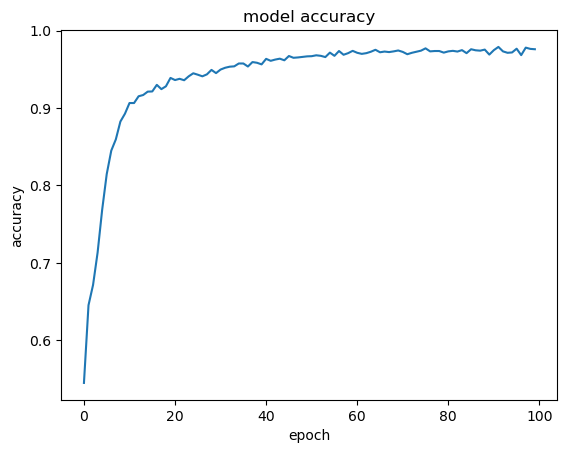

In [8]:
#Se grafica el accuracy durante el proceso de entrenamiento
plt.plot(history.history['accuracy'])

#Se establecen las etiquetas
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

<div align="justify">Como se observa, se dió un crecimiento continuo y pronunciado en el accuracy del modelo durante las primeras 20 iteraciones hasta alcanza un valor cercano a 0,95. Posterior a ello, el aumento en el accuracy se redujo de gran manera a pequeños aumentos cada vez, sin embargo, al final, se logra alcanzar valores cercanos a 0,98. Un aspecto importante es el hecho de que no se dieran picos y que el crecimiento fuera generalmente ascendente, lo anterior indica estabilidad en el modelo.</div>

In [9]:
print('Test Split: ')

#Se evalua el modelo con el conjunto de prueba. Para evaluarlo, se utiliza
#la pérdida y el accuracy alcanzado al final del proceso
loss, accuracy = model.evaluate(test_dataset, test_labels, verbose = 1)

Test Split: 
35/35 [==============================] - 0s 703us/step - loss: 0.0845 - accuracy: 0.9689


<div align="justify">Como se observa, el accuracy obtenido es de alrededor de 0,97-0,98 es bastante alto. Por lo tanto, se puede considerar que el modelo es capaz de predecir con gran precisión.</div>

In [10]:
#Se realiza la predicción con el modelo entrenado
example_result = model.predict(test_dataset) 
print('predicted values: ')

print(example_result) #Se imprimen las categorías predichas

#Se muestran las categorías reales
test_labels

predicted values: 
[[9.94042277e-01 5.06980950e-06 5.94707486e-12 3.97761166e-02]
 [7.29490638e-01 6.59483016e-01 8.29840943e-08 1.71547555e-07]
 [9.50045943e-01 1.11979512e-04 6.70751309e-16 5.81036508e-02]
 ...
 [5.42541742e-01 9.92419600e-01 4.69067693e-03 3.98610520e-11]
 [9.62207913e-01 1.17598176e-01 9.22319829e-01 2.07558259e-11]
 [4.84324396e-02 7.72472620e-01 8.18570196e-25 1.00598752e-01]]


,Label_Move-Forward,Label_Sharp-Right-Turn,Label_Slight-Left-Turn,Label_Slight-Right-Turn
1965,1,0,0,0
3879,1,0,0,0
2217,1,0,0,0
1931,1,0,0,0
1618,1,0,0,0
...,...,...,...,...
1876,0,1,0,0
2269,0,0,0,1
1794,0,1,0,0
1005,1,0,0,0


<div align="justify">Cuando el modelo predice los resultados, se le asigna un valor de entre 0 y 1 a cada categoría de clasificación. La columna con el mayor resultado, corresponderá a la categoría predicha. Al comparar las categorías predichas con las reales se aprecia que, al menos en el conjunto de muestra anterior, los mayores resultados se obtuvieron en las posiciones correspondientes en el conjunto real. Por lo tanto, se puede decir que fue una predicción exitosa.</div>

<div align="justify">Ahora, se desea representar los resultados en forma de una matriz de confusión. Para ello, primero se debe definir una funcion capaz de tomar la representación en forma de matriz, y pasarla a un solo valor (0, 1, 2 y 3).</div>

In [11]:
def clase(x): #Recibe un vector (vector con las cuatro categorías)
    largo = len(x) #largo del vector
    
    #Se guarda el vector ordenado de menor a mayor en otra variable
    temp = sorted(x) 
    
    clasificacion = 0 #Variable para guardar la clasificación obtenida
    
    i = 0
    while i<largo:
        #como temp está ordenado de menor a mayor, temp[3] será el mayor
        #miembro del array. Se comparará cada miembro del vector con el
        #mayor número, de esta forma, cuando se encuentre, se tendrá su
        #posición específica. La posición del dato se tomará como la clase.
        if x[i] == temp[3]:
            clasificacion = i
        i = i + 1
    return clasificacion

    #---------Correspondencia de clasificación------------
    
    #clasificacion = 0 -> Move Forward
    #clasificacion = 1 -> Sharp Right Turn
    #clasificacion = 2 -> Slight Left Turn
    #clasificacion = 3 -> Slight Right Turn

Con dicha funcion, se convertirá el conjunto de clasificación real y el predicho. Posteriormente, se procederá a generar la matriz de confusión.

In [12]:
#Se convierte el conjunto de datos a formato NumPy para poderlo manipular
#más fácilmente.
test_labels = pd.DataFrame.to_numpy(test_labels)
test_dataset = pd.DataFrame.to_numpy(test_dataset)

clases_teoricas = [] #array para guardar las clasificaciones teóricas
clases_predichas = [] #array para guardar las clasificaciones predichas

#Se recorre todo el conjunto de clasificaciones, fila por fila, y se utiliza
#función desarrollada anteriormente. De esta forma, en lugar de tener una matriz con
#4 columnas, se reduce a 1, con la clase de 0 a 3 según corresponda
for i in range(len(test_labels)):
    clases_teoricas.append(clase(test_labels[i]))
    clases_predichas.append(clase(example_result[i]))

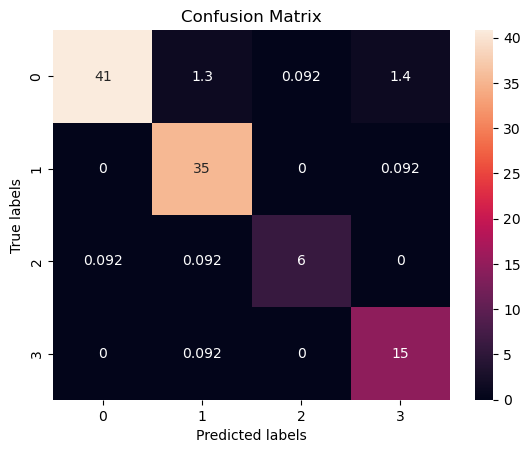

In [13]:
ax = plt.subplot() #Se inicializa la figura

cm = confusion_matrix(clases_teoricas, clases_predichas) #Se crea la matriz de confusión
cm = cm/1092*100

#Con el siguiente comando se consigue "estilizar" la matriz
sns.heatmap(cm, annot = True, ax = ax)

#Se definen etiquetas
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

<div align="justify">Una de las ventajas que posee la matriz de confusión para analizar el rendimiento de la red neuronal es que a simple vista permite observar los aciertos verdaderos, los cuales se presentan en la diagonal con colores diferentes. Antes de ejecutar el análisis es importante explicar que el “0” es equivalente a movimiento hacia delante, el “1” a giro brusco a la derecha, el “2” a giro leve a la izquierda y el “3” a leve giro a la derecha.</div>

<div align="justify">Al sumar la diagonal, se aprecia que la red tuvo un accuracy aproximado de 97%; lo que quiere decir que el restante 3% son falsos positivos o falsos negativos. Considerando que la aplicación es para un robot bastante robusto y resistente, este valor de aciertos es suficiente para asegurar el correcto funcionamiento de la red neuronal; ya que, ese 3% de error no va a representar una amenaza a la vida de ninguna persona.</div>

### Gráficas de 3 parámetros

<div align="justify">Para poder representar gráficamente las fronteras lineales de separación obtenidas, se harán combinaciones de tres parámetros a pesar de que fueran cuatro regiones. Esto es debido a que, por limitantes físicas, como que los seres humanos viven en tres dimensiones, aún no se posee el conocimiento para poder graficar en cuatro dimensiones. Además, el conjunto de datos se agrupará de acuerdo a la categoría a la que pertenezca.</div>

In [14]:
#Se definen 4 conjuntos para guardar los datos de acuerdo a su clasificación
rojo = [] # **Move Forward**
azul = [] #  **Sharp Right Turn**
verde = [] #  **Slight Left Turn**
amarillo = [] #  **Slight Right Turn**

#Se va revisando fila por fila el conjunto de datos, y según la clasificación 
#obtenida para dicha fila, se adjunta a alguno de los conjuntos anteriores.
for i in range(len(clases_predichas)):
    if clases_predichas[i] == 0:
        rojo.append(test_dataset[i])
    elif clases_predichas[i] == 1:
        azul.append(test_dataset[i])
    elif clases_predichas[i] == 2:
        verde.append(test_dataset[i])
    else:
        amarillo.append(test_dataset[i])

#Para corregir ciertos problemas de estructuración, se utiliza el comando
#np.array para redefinir cada uno de los conjuntos.
rojo = np.array(rojo)
azul = np.array(azul)
verde = np.array(verde)
amarillo = np.array(amarillo)

<div align="justify">Ya se tiene el conjunto de datos dividido por clase, se probarán 4 combinaciones de parámetros: sensores 1,2 y 3; sensores 1,2 y 4; sensores 1,3 y 4; y sensores 2,3 y 4. Para poder apreciar de mejor manera la regiones de clasificación, se rotará la figura para poder poder observar la "proyección" de los datos en cada uno de los planos.</div>

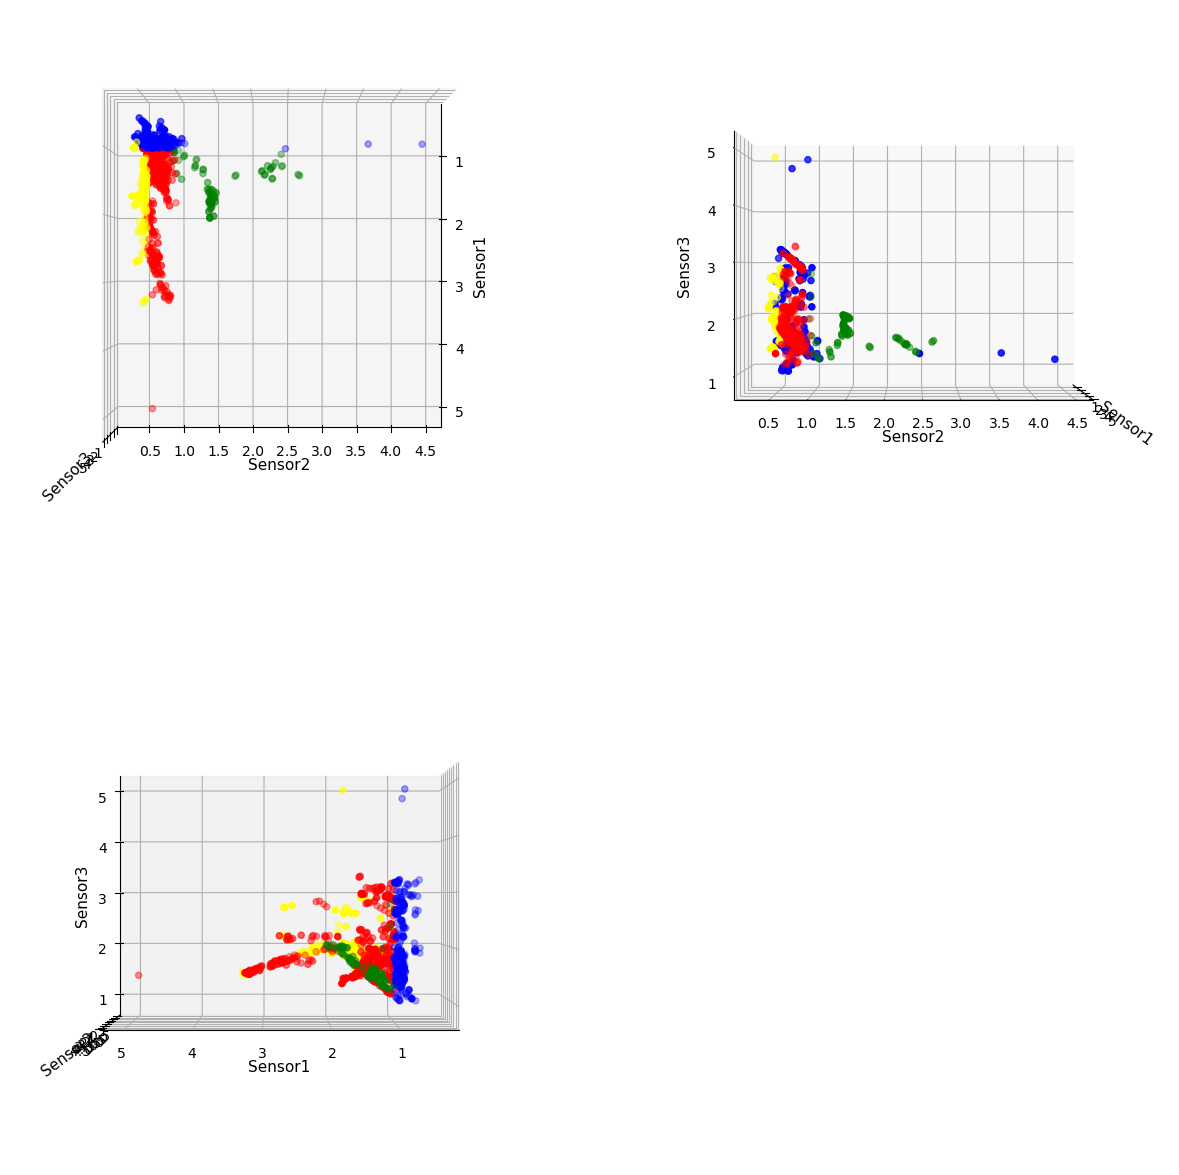

In [15]:
#------Sensores 1, 2 y 3-------------

#Se define el tamaño de la figura
fig = plt.figure(figsize=(15, 15))

#Se indica que se quieren colocar más de un gráfico en la figura.
ax = fig.add_subplot(2,2,1,projection='3d')

#Se establece la orientación del gráfico
ax.view_init(elev=90, azim=0)

#Se establecen las etiquetas de los ejes
ax.set_xlabel('Sensor1', fontsize=11, rotation = 0)
ax.set_ylabel('Sensor2', fontsize=11, rotation = 0)
ax.set_zlabel('Sensor3', fontsize=11, rotation = 0)

#Se definen los conjuntos de datos y sus colores.
ax.scatter3D(rojo[:,0],rojo[:,1],rojo[:,2],c='red')
ax.scatter3D(azul[:,0],azul[:,1],azul[:,2],c='blue')
ax.scatter3D(verde[:,0],verde[:,1],verde[:,2],c='green')
ax.scatter3D(amarillo[:,0],amarillo[:,1],amarillo[:,2],c='yellow')

#Se repite el procedimiento para los otros dos gráficos con distintas orientaciones
ax = fig.add_subplot(2,2,2,projection='3d')
ax.view_init(elev=0, azim=0)
ax.set_xlabel('Sensor1', fontsize=11, rotation = 0)
ax.set_ylabel('Sensor2', fontsize=11, rotation = 0)
ax.set_zlabel('Sensor3', fontsize=11, rotation = 0)
ax.scatter3D(rojo[:,0],rojo[:,1],rojo[:,2],c='red')
ax.scatter3D(azul[:,0],azul[:,1],azul[:,2],c='blue')
ax.scatter3D(verde[:,0],verde[:,1],verde[:,2],c='green')
ax.scatter3D(amarillo[:,0],amarillo[:,1],amarillo[:,2],c='yellow')

ax = fig.add_subplot(2,2,3,projection='3d')
ax.view_init(elev=0, azim=90)
ax.set_xlabel('Sensor1', fontsize=11, rotation = 0)
ax.set_ylabel('Sensor2', fontsize=11, rotation = 0)
ax.set_zlabel('Sensor3', fontsize=11, rotation = 0)
ax.scatter3D(rojo[:,0],rojo[:,1],rojo[:,2],c='red')
ax.scatter3D(azul[:,0],azul[:,1],azul[:,2],c='blue')
ax.scatter3D(verde[:,0],verde[:,1],verde[:,2],c='green')
ax.scatter3D(amarillo[:,0],amarillo[:,1],amarillo[:,2],c='yellow')

plt.show()

<div align="justify">Lo primero que se logra apreciar es que cuando únicamente se ven graficados los sensores 1 y 2, existen regiones fácilmente identificables para cada clasificación. En los otros dos casos, donde participa el sensor 3, los datos se traslapan; convirtiendo la tarea de clasificación en algo imposible. Para continuar con el análisis, se despreciará cualquier gráfica que posea al sensor 3, dado que no proporciona ningún tipo de información útil. 
</div>

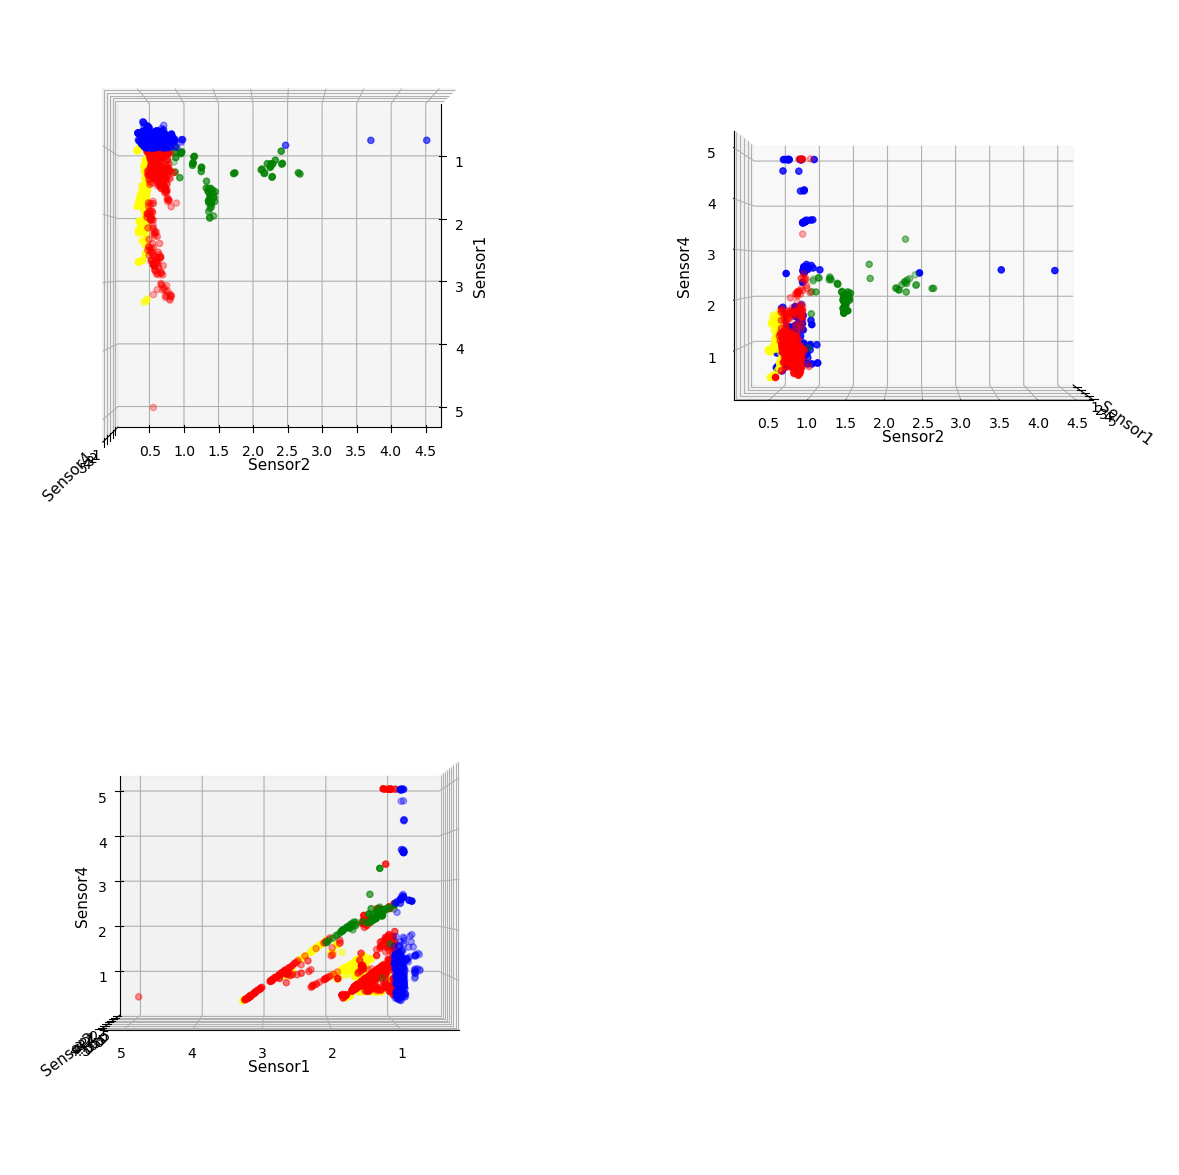

In [16]:
#-------Sensores 1, 2 y 4----------------

#Se repite el procedimiento anterior 
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(2,2,1,projection='3d')
ax.view_init(elev=90, azim=0)
ax.set_xlabel('Sensor1', fontsize=11, rotation = 0)
ax.set_ylabel('Sensor2', fontsize=11, rotation = 0)
ax.set_zlabel('Sensor4', fontsize=11, rotation = 0)
ax.scatter3D(rojo[:,0],rojo[:,1],rojo[:,3],c='red')
ax.scatter3D(azul[:,0],azul[:,1],azul[:,3],c='blue')
ax.scatter3D(verde[:,0],verde[:,1],verde[:,3],c='green')
ax.scatter3D(amarillo[:,0],amarillo[:,1],amarillo[:,3],c='yellow')

ax = fig.add_subplot(2,2,2,projection='3d')
ax.view_init(elev=0, azim=0)
ax.set_xlabel('Sensor1', fontsize=11, rotation = 0)
ax.set_ylabel('Sensor2', fontsize=11, rotation = 0)
ax.set_zlabel('Sensor4', fontsize=11, rotation = 0)
ax.scatter3D(rojo[:,0],rojo[:,1],rojo[:,3],c='red')
ax.scatter3D(azul[:,0],azul[:,1],azul[:,3],c='blue')
ax.scatter3D(verde[:,0],verde[:,1],verde[:,3],c='green')
ax.scatter3D(amarillo[:,0],amarillo[:,1],amarillo[:,3],c='yellow')

ax = fig.add_subplot(2,2,3,projection='3d')
ax.view_init(elev=0, azim=90)
ax.set_xlabel('Sensor1', fontsize=11, rotation = 0)
ax.set_ylabel('Sensor2', fontsize=11, rotation = 0)
ax.set_zlabel('Sensor4', fontsize=11, rotation = 0)
ax.scatter3D(rojo[:,0],rojo[:,1],rojo[:,3],c='red')
ax.scatter3D(azul[:,0],azul[:,1],azul[:,3],c='blue')
ax.scatter3D(verde[:,0],verde[:,1],verde[:,3],c='green')
ax.scatter3D(amarillo[:,0],amarillo[:,1],amarillo[:,3],c='yellow')

plt.show()

<div align="justify">Se puede observar un comportamiento muy similar al explicado anteriormente. Es decir, cuando se grafican únicamente los sensores 1 y 2, se identifican fácilmente las distintas regiones; sin embargo, cuando se grafica con el sensor 4, los datos se traslapan y se vuelve imposible determinar fronteras de separación lineal.
</div>

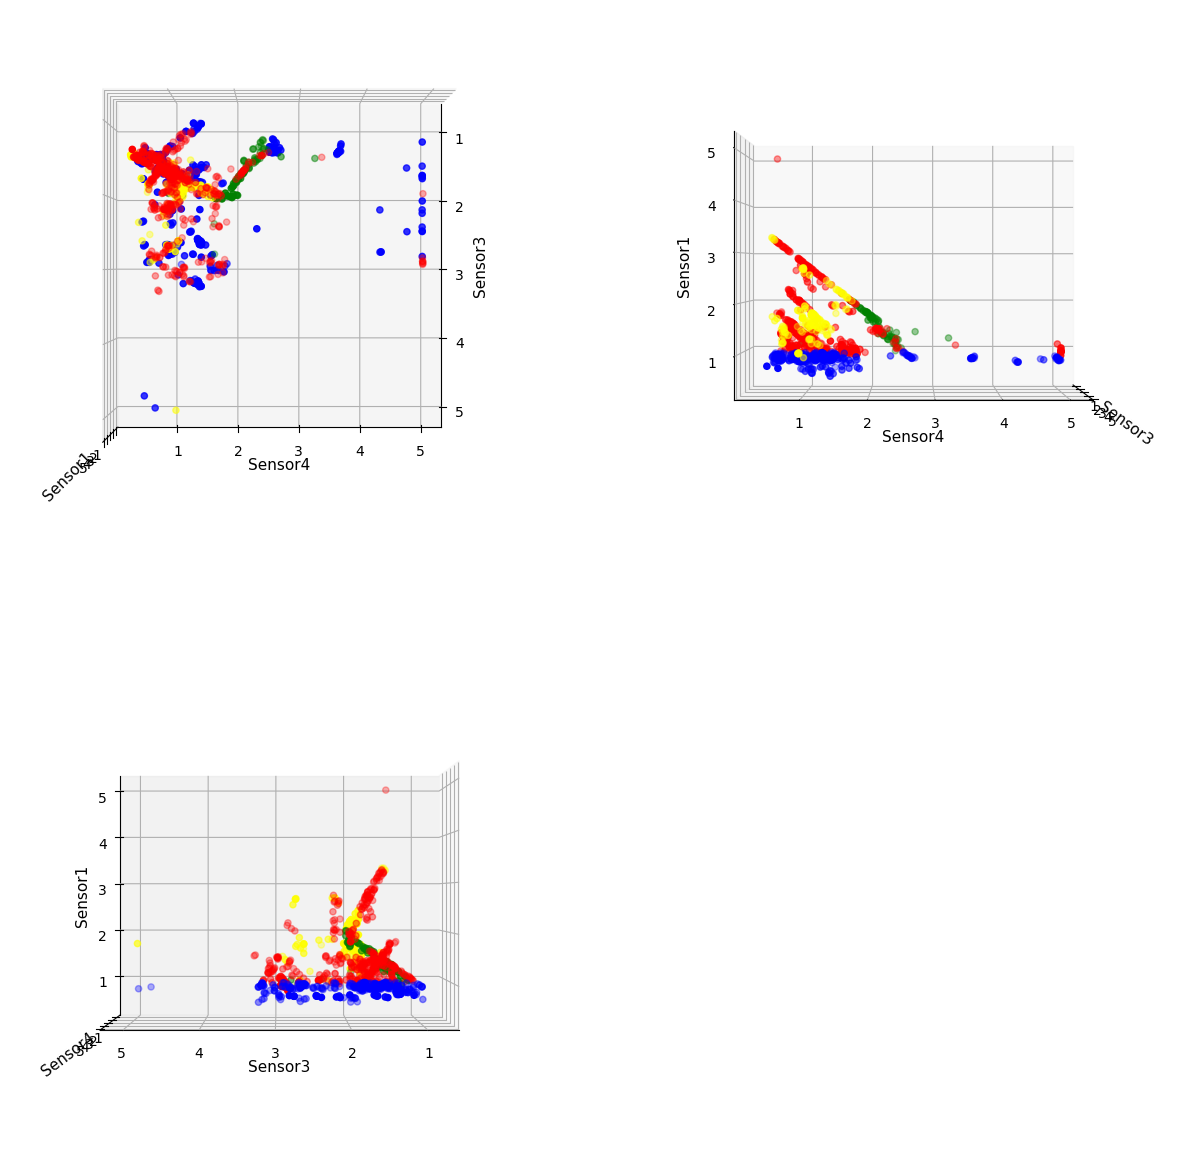

In [17]:
#-----------Sensores 1, 3 y 4-------------------

#Se repite el procedimiento anterior
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(2,2,1,projection='3d')
ax.view_init(elev=90, azim=0)
ax.set_xlabel('Sensor3', fontsize=11, rotation = 0)
ax.set_ylabel('Sensor4', fontsize=11, rotation = 0)
ax.set_zlabel('Sensor1', fontsize=11, rotation = 0)
ax.scatter3D(rojo[:,2],rojo[:,3],rojo[:,0],c='red')
ax.scatter3D(azul[:,2],azul[:,3],azul[:,0],c='blue')
ax.scatter3D(verde[:,2],verde[:,3],verde[:,0],c='green')
ax.scatter3D(amarillo[:,2],amarillo[:,3],amarillo[:,0],c='yellow')

ax = fig.add_subplot(2,2,2,projection='3d')
ax.view_init(elev=0, azim=0)
ax.set_xlabel('Sensor3', fontsize=11, rotation = 0)
ax.set_ylabel('Sensor4', fontsize=11, rotation = 0)
ax.set_zlabel('Sensor1', fontsize=11, rotation = 0)
ax.scatter3D(rojo[:,2],rojo[:,3],rojo[:,0],c='red')
ax.scatter3D(azul[:,2],azul[:,3],azul[:,0],c='blue')
ax.scatter3D(verde[:,2],verde[:,3],verde[:,0],c='green')
ax.scatter3D(amarillo[:,2],amarillo[:,3],amarillo[:,0],c='yellow')

ax = fig.add_subplot(2,2,3,projection='3d')
ax.view_init(elev=0, azim=90)
ax.set_xlabel('Sensor3', fontsize=11, rotation = 0)
ax.set_ylabel('Sensor4', fontsize=11, rotation = 0)
ax.set_zlabel('Sensor1', fontsize=11, rotation = 0)
ax.scatter3D(rojo[:,2],rojo[:,3],rojo[:,0],c='red')
ax.scatter3D(azul[:,2],azul[:,3],azul[:,0],c='blue')
ax.scatter3D(verde[:,2],verde[:,3],verde[:,0],c='green')
ax.scatter3D(amarillo[:,2],amarillo[:,3],amarillo[:,0],c='yellow')

plt.show()

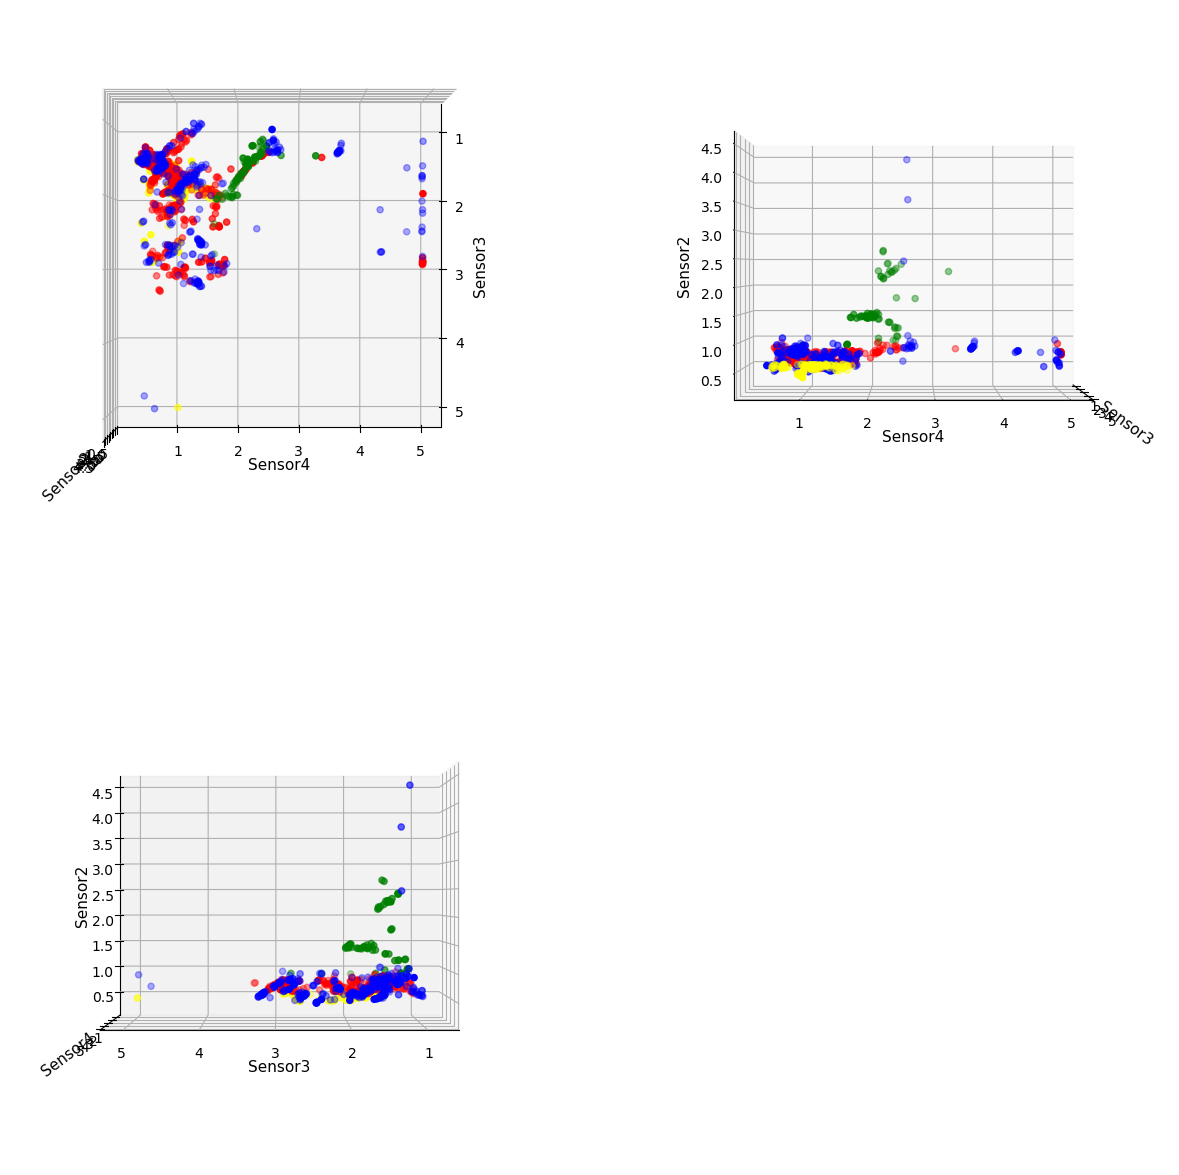

In [18]:
#------------Sensores 2, 3 y 4-------------------

#Se repite el procedimiento anterior
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(2,2,1,projection='3d')
ax.view_init(elev=90, azim=0)
ax.set_xlabel('Sensor3', fontsize=11, rotation = 0)
ax.set_ylabel('Sensor4', fontsize=11, rotation = 0)
ax.set_zlabel('Sensor2', fontsize=11, rotation = 0)
ax.scatter3D(rojo[:,2],rojo[:,3],rojo[:,1],c='red')
ax.scatter3D(azul[:,2],azul[:,3],azul[:,1],c='blue')
ax.scatter3D(verde[:,2],verde[:,3],verde[:,1],c='green')
ax.scatter3D(amarillo[:,2],amarillo[:,3],amarillo[:,1],c='yellow')

ax = fig.add_subplot(2,2,2,projection='3d')
ax.view_init(elev=0, azim=0)
ax.set_xlabel('Sensor3', fontsize=11, rotation = 0)
ax.set_ylabel('Sensor4', fontsize=11, rotation = 0)
ax.set_zlabel('Sensor2', fontsize=11, rotation = 0)
ax.scatter3D(rojo[:,2],rojo[:,3],rojo[:,1],c='red')
ax.scatter3D(azul[:,2],azul[:,3],azul[:,1],c='blue')
ax.scatter3D(verde[:,2],verde[:,3],verde[:,1],c='green')
ax.scatter3D(amarillo[:,2],amarillo[:,3],amarillo[:,1],c='yellow')

ax = fig.add_subplot(2,2,3,projection='3d')
ax.view_init(elev=0, azim=90)
ax.set_xlabel('Sensor3', fontsize=11, rotation = 0)
ax.set_ylabel('Sensor4', fontsize=11, rotation = 0)
ax.set_zlabel('Sensor2', fontsize=11, rotation = 0)
ax.scatter3D(rojo[:,2],rojo[:,3],rojo[:,1],c='red')
ax.scatter3D(azul[:,2],azul[:,3],azul[:,1],c='blue')
ax.scatter3D(verde[:,2],verde[:,3],verde[:,1],c='green')
ax.scatter3D(amarillo[:,2],amarillo[:,3],amarillo[:,1],c='yellow')

plt.show()

<div align="justify">Como una de las primeras conclusiones obtenidas es que, el robot de tipo SCITOS G5, podría trabajar de manera satisfactoria con dos sensores, específicamente con el sensor 1 y el sensor 2. Esto debido a que en todas las gráficas donde participan en conjunto, existe una clara línea de separación entre las regiones de las clasificaciones; permitiéndole tomar las decisiones correctas para un funcionamiento satisfactorio.
</div>

<div align="justify">Por su parte, los sensores 3 y 4 podrían ser desconectados y no se pondría en riesgo el funcionamiento del robot, esto queda demostrado al observar cualquier gráfica en la que se grafica alguno de estos sensores o los dos sensores al mismo tiempo. En ellas no existen regiones definidas por lo que, no hay manera de determinar de manera segura si el robot debe ejecutar la acción movimiento hacia delante, leve giro a la derecha, giro brusco a la derecha o giro leve a la izquierda.
</div>

   ### Introducción de ruido

<div align="justify">Para la generación del ruido, es necesario utilizar los valores promedio del conjunto de datos, por lo que se aprovechará de los comandos existentes para obtener las estadísticas de los mismos</div>

In [19]:
#Se convierte el test_dataset de vuelta a DataFrame para poder utilizar 
#sus comandos especiales
test_dataset = pd.DataFrame(data = test_dataset, columns = ['Sensor1','Sensor2','Sensor3','Sensor4'])

#Se guardan las estadísticas del conjunto de entrenamiento y prubea.
train_stats = train_dataset.describe()
test_stats = test_dataset.describe()

#Se realiza un reacomodo de las estadísticas
train_stats = train_stats.transpose()
test_stats = test_stats.transpose()

#Se guarda un array con los valores promedio para cada conjunto
#de datos
train_mean = train_stats['mean']
test_mean = test_stats['mean']


print('Promedios para los datos de entrenamiento: \n\n',train_mean)
print('\n\nPromedios para los datos de prueba: \n\n',test_mean)

Promedios para los datos de entrenamiento: 

 Sensor1    1.291518
Sensor2    0.682719
Sensor3    1.879776
Sensor4    1.276337
Name: mean, dtype: float64


Promedios para los datos de prueba: 

 Sensor1    1.285467
Sensor2    0.675475
Sensor3    1.889981
Sensor4    1.263105
Name: mean, dtype: float64


<div align="justify">Una vez utilizados los comandos requeridos para las estaísticas, los conjuntos se convertirán de su formato de DataFrame, a un formato de NumPy array para, nuevamente, poderlos manipular más fácilmente.</div>

In [20]:
#DataFrame -> NumPy array
train_dataset = pd.DataFrame.to_numpy(train_dataset)
test_dataset = pd.DataFrame.to_numpy(test_dataset)

<div align="justify">Ahora se construirá una función para generar el ruido deseado en los conjuntos de datos.</div>

In [21]:
def ruido(x,promedios):
    #Nuevo array para guardar el conjunto con ruido
    nuevoarray = [] 
    for i in x:
        nuevafila = []
        m = 0
        for j in i:
            #Se genera un signo aleatorio (-1 o 1), para poder
            #sumar o restar de forma aleatoria
            signo = rd.randint(0,1)
            if signo == 0:
                signo = -1
            #Se genera un numero aleatorio entre 30 y 60
            aleatorio = rd.randint(30,60)
            #Se divide entre 1000, para utilizarlo como porcentaje
            aleatorio = signo*aleatorio / 1000
            #A cada valor se le suma un porcentaje de entre 3% y 6%
            #del promedio de su columna
            valor = j+aleatorio*promedios[m]
            #Todo se guarda en un vector
            nuevafila.append(valor)
            m = m+1
        #Se va generando el conjunto nuevo
        nuevoarray.append(nuevafila)
    return nuevoarray

#Se generan los conjuntos con ruido
train_noise = ruido(train_dataset, train_mean)
test_noise = ruido(test_dataset, test_mean)

#Se redefinen los conjuntos con NumPy para evitar problemas
test_noise = np.array(test_noise)
train_noise = np.array(train_noise)

print('Conjunto de entrenamiento con ruido: \n\n',train_noise,'\n')
print('Conjunto de entrenamiento sin ruido: \n\n',train_dataset,'\n')
print('Conjunto de prueba con ruido: \n\n',test_noise,'\n')
print('Conjunto de prueba con ruido: \n\n',test_dataset,'\n')


Conjunto de entrenamiento con ruido: 

 [[1.48095223 0.45364308 1.74301118 1.09173582]
 [0.50238348 0.53548157 1.94034949 1.09202755]
 [1.79761652 0.44578755 1.99620783 1.02870989]
 ...
 [0.7976308  0.50099148 2.0489068  1.06760454]
 [2.12553527 0.59945323 2.71372693 0.75556483]
 [1.07792232 0.56515299 1.82472693 0.88177553]] 

Conjunto de entrenamiento sin ruido: 

 [[1.428 0.483 1.837 1.153]
 [0.576 0.515 1.852 1.018]
 [1.724 0.469 2.062 1.067]
 ...
 [0.848 0.473 1.938 1.111]
 [2.07  0.566 2.772 0.813]
 [1.127 0.587 1.883 0.929]] 

Conjunto de prueba con ruido: 

 [[1.15200865 0.61169449 1.63769942 1.04741837]
 [0.94684948 0.68066806 2.18849904 1.61547579]
 [1.05015052 0.57601901 2.04928092 0.73842337]
 ...
 [0.79943772 0.78204544 1.51560906 0.79110284]
 [0.90815571 0.80335837 1.195721   0.62368248]
 [0.94998962 0.43987529 1.31706088 0.39310684]] 

Conjunto de prueba con ruido: 

 [[1.197 0.584 1.581 0.983]
 [0.907 0.655 2.094 1.666]
 [1.09  0.549 2.14  0.794]
 ...
 [0.847 0.753 1.42

<div align="justify">Ya se tienen los conjuntos de datos con el ruido aplicado, ahora se puede proceder a entrenar la red neuronal con dichos datos. Se utilizará el modelo óptimo encontrado anteriormente.</div>

In [22]:
model = build_model()

#Se realiza el proceso de entrenamiento
with tf.device('/CPU:0'): 
    history = model.fit(
        train_noise, #datos de entrenamiento
        train_labels, #categorías
        batch_size = batch_size,
        epochs = EPOCHS, #número de ciclos
        verbose = 1,
        shuffle = True,
        steps_per_epoch = int(train_noise.shape[0] / batch_size),
    )

Epoch 1/100
272/272 [==============================] - 1s 593us/step - loss: 1.1500 - accuracy: 0.5200
Epoch 2/100
272/272 [==============================] - 0s 526us/step - loss: 0.8511 - accuracy: 0.6794
Epoch 3/100
272/272 [==============================] - 0s 536us/step - loss: 0.6899 - accuracy: 0.7017
Epoch 4/100
272/272 [==============================] - 0s 611us/step - loss: 0.5904 - accuracy: 0.7401
Epoch 5/100
272/272 [==============================] - 0s 591us/step - loss: 0.5241 - accuracy: 0.7737
Epoch 6/100
272/272 [==============================] - 0s 579us/step - loss: 0.4692 - accuracy: 0.8061
Epoch 7/100
272/272 [==============================] - 0s 589us/step - loss: 0.4330 - accuracy: 0.8296
Epoch 8/100
272/272 [==============================] - 0s 598us/step - loss: 0.3925 - accuracy: 0.8597
Epoch 9/100
272/272 [==============================] - 0s 615us/step - loss: 0.3654 - accuracy: 0.8793
Epoch 10/100
272/272 [==============================] - 0s 657us/step - l

272/272 [==============================] - 0s 545us/step - loss: 0.2156 - accuracy: 0.9029
Epoch 80/100
272/272 [==============================] - 0s 541us/step - loss: 0.2289 - accuracy: 0.8990
Epoch 81/100
272/272 [==============================] - 0s 552us/step - loss: 0.2153 - accuracy: 0.9048
Epoch 82/100
272/272 [==============================] - 0s 530us/step - loss: 0.2176 - accuracy: 0.9064
Epoch 83/100
272/272 [==============================] - 0s 501us/step - loss: 0.2238 - accuracy: 0.9016
Epoch 84/100
272/272 [==============================] - 0s 501us/step - loss: 0.2187 - accuracy: 0.9055
Epoch 85/100
272/272 [==============================] - 0s 497us/step - loss: 0.2284 - accuracy: 0.9004
Epoch 86/100
272/272 [==============================] - 0s 493us/step - loss: 0.2196 - accuracy: 0.9025
Epoch 87/100
272/272 [==============================] - 0s 530us/step - loss: 0.2126 - accuracy: 0.9064
Epoch 88/100
272/272 [==============================] - 0s 537us/step - loss:

<div align="justify">Ahora, se probará su desempeño con el conjunto de datos de prueba. Para ello, se mostrará la gráfica del accuracy en función de las iteraciones, el accuracy alcanzado con el conjunto de prueba y la matriz de confusión.</div>

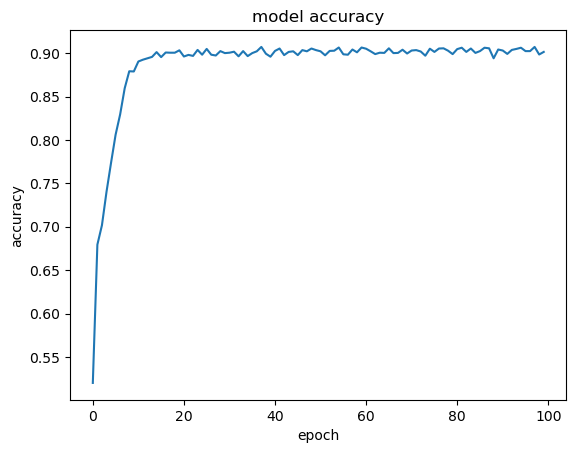

In [23]:
#Se grafica el accuracy durante el proceso de entrenamiento
plt.plot(history.history['accuracy'])

#Se establecen las etiquetas
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

<div align="justify">La gráfica obtenida presenta un comportamiento similar al que se presentaba en el entrenamiento con datos sin ruido. La principal diferencia radica en que el crecimiento acelerado en el accuracy se detiene alrededor de 0,9, mientras que en el otro caso lo hacía en alrededor de 0,95.</div>

In [24]:
print('Test Split: ')

#Se evalua el modelo con el conjunto de prueba. Para evaluarlo, se utiliza
#la pérdida y el accuracy alcanzado
loss, accuracy = model.evaluate(test_noise, test_labels, verbose = 1)

Test Split: 
35/35 [==============================] - 0s 646us/step - loss: 0.2443 - accuracy: 0.8993


<div align="justify">Con el conjunto de datos sin ruido, se lograba alcanzar valores de accuracy de alrededor de 0,98-0,97, bastante alto, sin embargo, tras la introducción del ruido, este valor se reduce a alrededor de 0,88. Lo anterior es esperable, puesto que a pesar de utilizar la misma configuración óptima encontrada para la red neuronal, a los datos se les introduce un componente de aleatoriedad que lo vuelve más impredescible y dificulta el proceso de clasificación. </div>

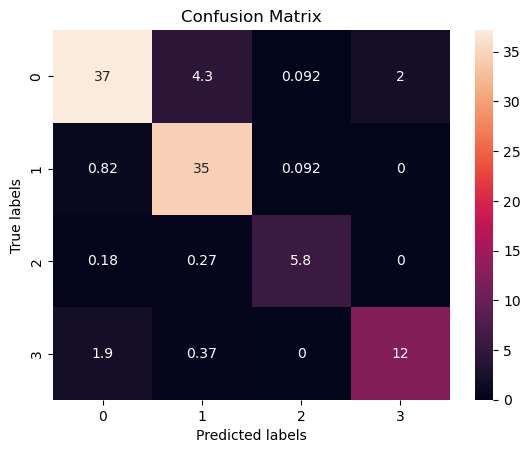

In [25]:
#Se obtienen las categorías predichas
example_noise_result = model.predict(test_noise) 

clases_predichas = []

#Se agrupan las categorías predichas en la forma 0, 1, 2 y 3
for i in range(len(example_noise_result)):
    clases_predichas.append(clase(example_noise_result[i]))

ax = plt.subplot() #Se inicializa la figura

cm = confusion_matrix(clases_teoricas, clases_predichas) #Se crea la matriz de confusión
cm = cm/1092*100

#Con el siguiente comando se consigue "estilizar" la matriz
sns.heatmap(cm, annot = True, ax = ax)

#Se definen etiquetas
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

<div align="justify">Para una mejor comprensión es importante explicar que el “0” es equivalente a movimiento hacia delante, el “1” a giro brusco a la derecha, el “2” a giro leve a la izquierda y el “3” a leve giro a la derecha.</div>

<div align="justify">Al sumar la diagonal, se aprecia que la red tuvo aproximadamente un accuracy de 88%; lo cual es un 9% menos que para los datos sin ruido. Esto muestra que el rendimiento de la red es fácilmente alterable por los niveles de ruido. </div>

<div align="justify">Otro detalle que es muy importante destacar, es que previamente con los datos sin ruido, la clasificación “movimiento hacia adelante” no presentaba falsos positivos. Sin embargo, en esta ocasión sí los presenta. De igual manera, la mayoría de los casos de falsos positivos y falsos negativos incrementaron al ejecutar la red con los datos con ruido.</div>

<div align="justify">Es importante recordar que el ruido es un problema que se debe solucionar en etapas previas a la introducción de las entradas a la red como en la etapa de recolección de datos. De igual manera, por la aplicación, en la cual un error lo que puede provocar es que un robot se golpee contra una pared, el 88% se puede seguir considerando como un buen valor de aciertos.</div>

### Bibliografía 

<div align="justify">[1] A.P. Engelbrecht, Computational Intelligence An Introduction. Segunda Edición. Chichester: John Wiley & Sons Ltd, 2007. </div>
<br>
<div align="justify">[2] A.Gad (2018, Jun 27). Beginners Ask “How Many Hidden Layers/Neurons to Use in Artificial Neural Networks?” [Online] Recuperado de: https://towardsdatascience.com/beginners-ask-how-many-hidden-layers-neurons-to-use-in-artificial-neural-networks-51466afa0d3e</div>
<br>
<div align="justify">[3] TensorFlow (s.f). SGD [Online] Recuperado de: https://www.tensorflow.org/swift/api_docs/Classes/SGD</div>
<br>
<div align="justify">[4] TensorFlow (s.f). tf.keras.optimizers.Adam [Online] Recuperado de: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam</div>
<br>
<div align="justify">[5] S.Park (2021, Jun 20). A 2021 Guide to improving CNNs-Optimizers: Adam vs SGD [Online] Recuperado de: https://medium.com/geekculture/a-2021-guide-to-improving-cnns-optimizers-adam-vs-sgd-495848ac6008</div>
<br>
<div align="justify">[6] S.Ruder (2016, Ene 19). An overview of gradient descent optimization algorithms [Online] Recuperado de: https://ruder.io/optimizing-gradient-descent/</div>
<br>
<div align="justify">[7] A. Murphy y F.Gaillard (s.f). Batch size (machine learning) [Online] Recuperado de: https://radiopaedia.org/articles/batch-size-machine-learning</div>
<br>
<div align="justify">[8] Y.Bengio (2012, Sep 16). Practical Recommendations for Gradient-Based Training of Deep Architectures [Online] Recuperado de: https://arxiv.org/pdf/1206.5533.pdf</div>